In [97]:
import cv2

from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import tabulate

import analysis_library as al

%matplotlib widget

      name   min    max        mean  median        std  kurtosis  skewness  \
1668     1  48.0  250.0  195.469055   198.0  21.096392  0.524867 -0.675333   
1669     1  22.0  254.0  195.403046   199.0  26.436142  0.627137 -0.769246   
1670     1  70.0  244.0  195.398911   197.0  16.901287  0.552509 -0.682990   
1671     1  69.0  243.0  195.381393   197.0  16.786297  0.609655 -0.700042   
1672     1  65.0  238.0  195.374481   198.0  15.603408  0.705934 -0.752072   
...    ...   ...    ...         ...     ...        ...       ...       ...   
1759  59_1   0.0  167.0   30.923395    27.0  23.963108  0.467638  0.870420   
1760  59_1   0.0   71.0   30.876324    31.0  10.471887 -0.496175  0.045049   
1761  59_1   0.0  123.0   30.806252    29.0  17.100439  0.078018  0.553005   
1762  59_1   0.0  156.0   30.915270    27.0  23.197475  0.290956  0.795615   
1763  59_1   0.0  128.0   30.828627    29.0  17.119329  0.047606  0.544026   

          sr       r image  
1668  0.0562  0.2249   102  
1669 

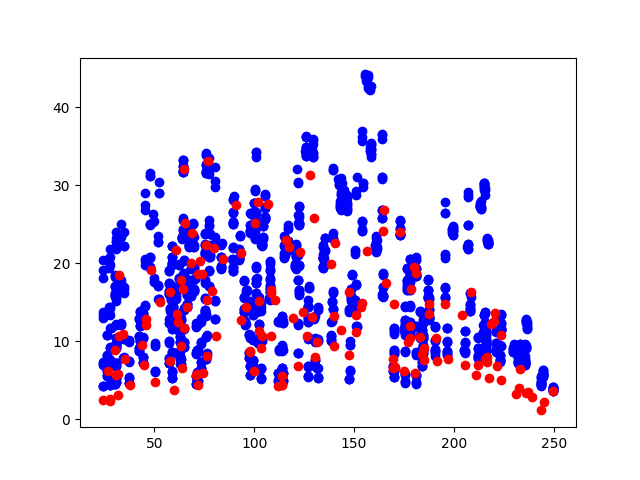

In [301]:

dtypes = {'name': str, 'min': np.float32, 'max': np.float32, 'mean': np.float32, 'median': np.float32, 'std': np.float32, 'kurtosis': np.float32, 'skewness': np.float32, 'image': str}
dtypes_renoise = dtypes.copy()
dtypes_renoise['r'] = np.float32
dtypes_renoise['sr'] = np.float32
noise_data = pd.read_csv('analysis_output/all_noise_data.csv', dtype=dtypes)
renoise_data = pd.read_csv('analysis_output/all_renoise_data.csv', dtype=dtypes_renoise)


name = '102'
segment = '59_2'
print(renoise_data.loc[renoise_data['image']==name])
relevant_noise = noise_data.loc[noise_data['image']==name].loc[noise_data['name']==segment]
relevant_renoise = renoise_data.loc[renoise_data['image']==name].loc[renoise_data['name']==segment]



plt.figure()
plt.scatter(renoise_data['mean'], renoise_data['std'], c='blue')
plt.scatter(noise_data['mean'], noise_data['std'], c='red')
plt.show()

# Data loading

In [181]:
dtypes = {'name': str, 'min': np.float32, 'max': np.float32, 'mean': np.float32, 'median': np.float32, 'std': np.float32, 'kurtosis': np.float32, 'skewness': np.float32, 'image': str}
dtypes_renoise = dtypes.copy()
dtypes_renoise['r'] = np.float32
dtypes_renoise['sr'] = np.float32
noise_data = pd.read_csv('analysis_output/all_noise_data.csv', dtype=dtypes)
renoise_data = pd.read_csv('analysis_output/all_renoise_data.csv', dtype=dtypes_renoise)

In [305]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

In [334]:
with open('analysis_output/for_renoising.txt') as f:
    images = f.read().splitlines()

all_predictions = []
for image in images:
    noise_image_data = noise_data.loc[noise_data['image'] == image]
    segments = [f.replace('segment_','') for f in os.listdir(os.path.join('analysis_output', image, 'renoised_segments'))
               if os.path.isdir(os.path.join('analysis_output', image, 'renoised_segments',f))]

    predicted_outputs = []
    for name in segments:
        noise_segment_data = noise_image_data.loc[noise_image_data['name']==name]

        training_data = renoise_data[["min", "max", "mean", "median", "std", "kurtosis", "skewness"]]
        training_classes_r = renoise_data['r']
        training_classes_sr = renoise_data['sr']

        datapoint = noise_segment_data[["min", "max", "mean", "median", "std", "kurtosis", "skewness"]]

        base_regressor = KNeighborsRegressor(n_neighbors=20)
        multioutput_regressor = MultiOutputRegressor(base_regressor)
        multioutput_regressor.fit(training_data, np.column_stack((training_classes_r, training_classes_sr)))
        prediction = multioutput_regressor.predict(datapoint)

        predicted_outputs.append([prediction[0][0], prediction[0][1]])

    all_predictions.append([image, np.mean(np.array(predicted_outputs)[:,0]), np.mean(np.array(predicted_outputs)[:,1])])

all_predictions = np.array(all_predictions)
print(all_predictions)

[['006' '0.11552875' '0.029805']
 ['008' '0.073965006' '0.017835835']
 ['010' '0.07263333' '0.016878335']
 ['012' '0.081520006' '0.01891875']
 ['014' '0.07919167' '0.018888334']
 ['016' '0.07573201' '0.019009002']
 ['018' '0.10459001' '0.027140003']
 ['020' '0.08335786' '0.021677855']
 ['023' '0.08410375' '0.02117875']
 ['026' '0.091640905' '0.023653638']
 ['028' '0.089044996' '0.02108375']
 ['030' '0.08393375' '0.019421251']
 ['039' '0.087824' '0.024366003']
 ['041' '0.16301666' '0.042918336']
 ['042' '0.09497222' '0.024346111']
 ['043' '0.08625801' '0.020635']
 ['045' '0.111738324' '0.031071668']
 ['049' '0.14550999' '0.03611']
 ['051' '0.09758' '0.02463625']
 ['053' '0.08984201' '0.022746']
 ['057' '0.1113975' '0.0277175']
 ['064' '0.08565751' '0.020156251']
 ['067' '0.069898' '0.017394003']
 ['069' '0.136585' '0.036205']
 ['070' '0.078965835' '0.018593334']
 ['079' '0.060906667' '0.016251666']
 ['080' '0.083577' '0.01985']
 ['083' '0.096702' '0.026266']
 ['085' '0.10485667' '0.0278

In [335]:
csv_header = ['image', 'r', 'sigmaR']
with open(os.path.join('analysis_output', "predictions.csv"), "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(csv_header)
    writer.writerows(all_predictions)